In [1]:
path = ""

In [2]:
from __future__ import division,print_function

#import cPickle as pickle
import numpy as np
import itertools
import cv2
from numpy.random import random, permutation, randn, normal, uniform, choice
#import bcolz
from IPython.lib.display import FileLink
import theano
import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.layer_utils import layer_from_config
from keras.metrics import categorical_crossentropy, categorical_accuracy
from keras.layers.convolutional import *
from keras.preprocessing import image

Using Theano backend.


In [3]:
batch_size=8

In [4]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(640,480)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)
#Takes numpy data & label arrays,

In [5]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)


Found 4959 images belonging to 2 classes.
Found 988 images belonging to 2 classes.


In [6]:
def onehot(x):
    return to_categorical(x)

In [7]:
def get_data(path, target_size=(640,480)):
    batches = get_batches(path, shuffle=False, batch_size=1, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.nb_sample)])


In [8]:
def get_classes(path):
    batches = get_batches(path+'train', shuffle=False, batch_size=1)
    val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
    test_batches = get_batches(path+'test', shuffle=False, batch_size=1)
    return (val_batches.classes, batches.classes, onehot(val_batches.classes), onehot(batches.classes),
        val_batches.filenames, batches.filenames, test_batches.filenames)


In [9]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)


####4643 image ---training
####988 images ---validation
#### 0  images  ---testing

Found 4959 images belonging to 2 classes.
Found 988 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [10]:
########################## for training ##################
def conv1(batches):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,640,480)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(2, activation='softmax')
        ])
    return model
    
model = conv1(batches)  
model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
#                     nb_val_samples=val_batches.nb_sample)

/home/ashi/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/ashi/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/ashi/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


Epoch 1/4
4959/4959 [==============================] - 4154s - loss: 0.2188 - acc: 0.9161 - val_loss: 0.0741 - val_acc: 0.9767
Epoch 2/4
4959/4959 [==============================] - 4534s - loss: 0.0934 - acc: 0.9673 - val_loss: 0.0594 - val_acc: 0.9838
Epoch 3/4
4959/4959 [==============================] - 4565s - loss: 0.0626 - acc: 0.9784 - val_loss: 0.0846 - val_acc: 0.9585
Epoch 4/4
4959/4959 [==============================] - 4915s - loss: 0.0791 - acc: 0.9744 - val_loss: 0.0208 - val_acc: 0.9929


In [22]:
################# for testing #####################
def conv1(batches):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,640,480)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(2, activation='softmax')
        ])
    return model
    
model = conv1(batches)  
model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
#                     nb_val_samples=val_batches.nb_sample)

In [11]:
#model.save_weights('conv2new.h5')

/home/ashi/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
model.load_weights("conv1.h5")

In [29]:
% cd test

/home/ashi/data/test


In [30]:
#from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
# dimensions of our images
img_width, img_height =640,480

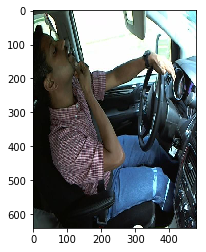

(3, 640, 480)
(1, 3, 640, 480)
1/1 [==============================] - 0s
1
Unsafe Driving!


In [31]:
img = image.load_img('img_64844.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
images = np.vstack([x])

classes = model.predict_classes(images)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")
############ correct prediction
###########  setting hairs

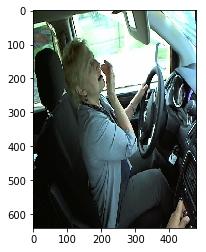

1/1 [==============================] - 0s
1
Unsafe Driving!


In [32]:
img = image.load_img('img_64788.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")


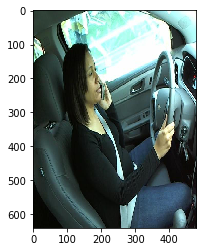

1/1 [==============================] - 0s
1
Unsafe Driving!


In [33]:
img = image.load_img('img_502.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")
#

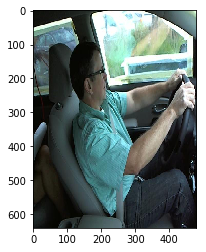

1/1 [==============================] - 0s
0
Driving Safely


In [34]:
img = image.load_img('img_609.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")
#########correct prediction 
#########drviving safely

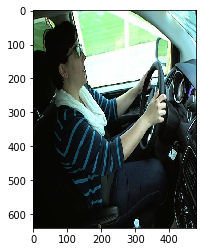

1/1 [==============================] - 0s
0
Driving Safely


In [35]:
img = image.load_img('img_772.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")

#########correct prediction 
#########drviving safely

Total 6 frames in the gif!


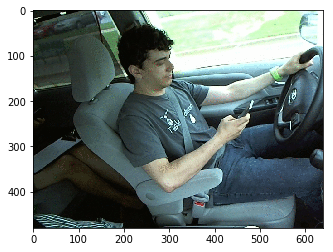

1/1 [==============================] - 0s
1


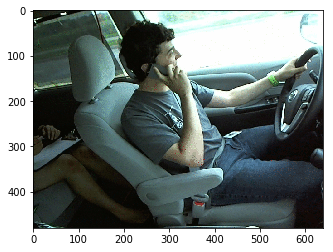

1/1 [==============================] - 0s
1


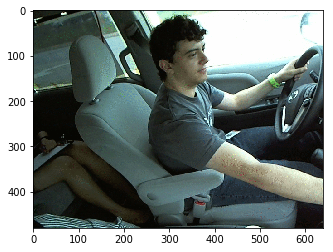

1/1 [==============================] - 0s
1


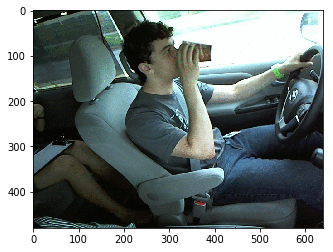

1/1 [==============================] - 0s
1


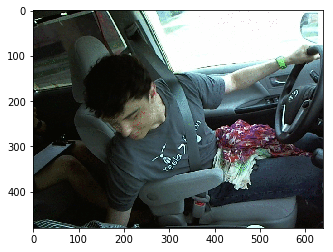

1/1 [==============================] - 0s
1


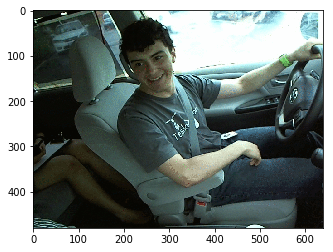

1/1 [==============================] - 0s
1


In [49]:
import imageio
gif = imageio.mimread("output_DEb8oT.gif")
nums = len(gif)
print("Total {} frames in the gif!".format(nums))
imgs = [img for img in gif]
for i in range(0,6):
    #print(imgs[i].shape[:3])
    plt.imshow(imgs[i])
    plt.show()
    imgs[i] = imgs[i][:,:,:3]
    imgs[i]=imgs[i].reshape(640,480,3)
    x = image.img_to_array(imgs[i])
    #print(x.shape())
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    print (classes[0])
    



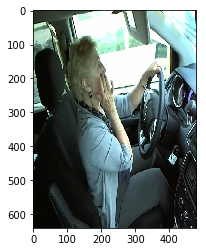

1/1 [==============================] - 0s
1
Unsafe Driving!


In [38]:
img = image.load_img('img_64748.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")

#########correct prediction 
#########drviving safely

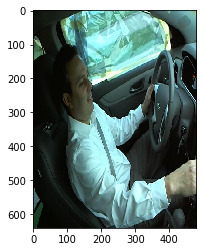

1/1 [==============================] - 0s
1
Unsafe Driving!


In [50]:
img = image.load_img('img_100579.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")

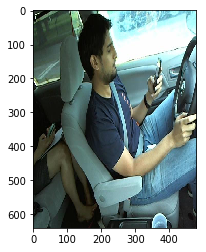

1/1 [==============================] - 0s
1
Unsafe Driving!


In [51]:
img = image.load_img('img_216.jpg', target_size=(img_width, img_height))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print (classes[0])
if classes[0]== 0:
    print("Driving Safely")
else :
    print("Unsafe Driving!")